### RFM 분석
#### 사용자별로 얼마나 최근에, 얼마나 자주, 얼마나 많은 금액을 지출했는지에 따라 사용자들의 분포를 확인하거나 사용자 그룹(또는 등급)을 나누어 분류하는 분석 기법이다. 구매 가능성이 높은 고객을 선정할 때 용이한 데이터 분석방법이며, 사용자들의 평소 구매 패턴을 기준으로 분류를 진행하기 때문에 각 사용자 그룹의 특성에 따라 차별화된 마케팅 메시지를 전달할 수 있다.
- Recency : 얼마나 최근에 구매했는가
- Frequency : 얼마나 자주 구매했는가
- Monetary : 얼마나 많은 금액을 지출했는가

### 고객 분석
- InvoiceNo: 거래 번호
- StockCode: 상품 코드
- Description: 상품명 
- InvoiceDate: 거래 날짜
- UnitPrice: 상품 단가
- CustomerID: 고객 번호
- Country: 국가명

In [61]:
import pandas as pd
import chardet

customer_invoice_df = pd.read_csv('./datasets/customer_invoice_data.csv')
customer_invoice_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [62]:
customer_invoice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### 결측치 검사
📌 결측치: 값이 없는 것, Null 또는 NA로 표현.

In [63]:
customer_invoice_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### 결측치 행 삭제
- 결측치가 고객의 구분점인 CustomerID이므로 분석 후 연계 불가능.
- CustomerID가 있는 행만 분석하도록 한다.

In [64]:
customer_invoice_df = customer_invoice_df.drop(index=customer_invoice_df[customer_invoice_df['CustomerID'].isna()].index, axis=1)
customer_invoice_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [65]:
customer_invoice_df = customer_invoice_df.reset_index(drop=True)
customer_invoice_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### 중복행 검사

In [66]:
customer_invoice_df.duplicated().sum()
customer_invoice_df[customer_invoice_df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
406595,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
406609,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
406612,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
406619,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


### 중복행 검사

In [67]:
customer_invoice_df[customer_invoice_df['InvoiceNo'] == '536409']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
483,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,3,12/1/2010 11:45,6.35,17908.0,United Kingdom
484,536409,21479,WHITE SKULL HOT WATER BOTTLE,1,12/1/2010 11:45,3.75,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
486,536409,22785,SQUARECUSHION COVER PINK UNION FLAG,1,12/1/2010 11:45,6.75,17908.0,United Kingdom
487,536409,22975,SPACEBOY CHILDRENS EGG CUP,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
488,536409,22972,CHILDREN'S SPACEBOY MUG,1,12/1/2010 11:45,1.65,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
490,536409,22568,FELTCRAFT CUSHION OWL,1,12/1/2010 11:45,3.75,17908.0,United Kingdom
491,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
492,536409,22664,TOY TIDY DOLLY GIRL DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom


### 데이터 전처리
> 데이터 유형을 변환하거나 데이터 분석에 용이한 형태로 변환하는 작업을 통해,  
불필요한 컬럼 삭제, 열 병합 등을 통해 데이터를 정제하는 처리방식
- InvoiceDate를 오늘 날짜로부터 몇 일 차이인지로 변환 후 최근 구매 척도인 Recency로 변환
- UnitPrice와 Quantity을 곱하여 전체 금액을 구한 뒤 지출 금액의 척도인 Monetary로 변환
- CustomerID별 구매 횟수를 구매 빈도의 척도인 Frequency로 변환
- 시각화를 통해 발생하는 이상치를 대표값으로 대체

In [68]:
customer_invoice_df['Recency'] = pd.to_datetime(customer_invoice_df['InvoiceDate']).apply(lambda x: (pd.to_datetime('2023-09-29') - x).days)
customer_invoice_df = customer_invoice_df.drop(['InvoiceDate'], axis=1)
customer_invoice_df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,4684
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,4684
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,4684
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,4684
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,4684
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,4311
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,4311
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,4311
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,4311


In [69]:
customer_invoice_df['Monetary'] = customer_invoice_df['UnitPrice'] * customer_invoice_df['Quantity']
customer_invoice_df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Recency,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,4684,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,4684,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,4684,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,4684,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,4684,20.34
...,...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,4311,10.20
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,4311,12.60
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,4311,16.60
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,4311,16.60


In [70]:
customer_invoice_df = customer_invoice_df.groupby('CustomerID') \
.agg({'CustomerID': 'count', 'Recency': 'min', 'Monetary': 'sum'}) \
.rename(columns={'CustomerID': 'Frequency'})

customer_invoice_df

,Frequency,Recency,Monetary
CustomerID,,,
12346.0,2,4636,0.00
12347.0,182,4313,4310.00
12348.0,31,4386,1797.24
12349.0,73,4329,1757.55
12350.0,17,4621,334.40
...,...,...,...
18280.0,10,4588,180.60
18281.0,7,4491,80.82
18282.0,13,4318,176.60


In [71]:
customer_invoice_df[customer_invoice_df['Monetary'] <= 0]

,Frequency,Recency,Monetary
CustomerID,,,
12346.0,2,4636,0.000000e+00
12503.0,1,4648,-1.126000e+03
12505.0,1,4612,-4.500000e+00
12605.0,3,4676,-7.500000e+00
12666.0,2,4670,-2.274400e+02
12870.0,2,4677,-1.490000e+01
12943.0,1,4612,-3.750000e+00
13154.0,1,4455,-6.118600e+02
13256.0,1,4325,0.000000e+00


In [72]:
customer_invoice_df['Monetary'] = customer_invoice_df['Monetary'].astype('int32')
customer_invoice_df = customer_invoice_df.drop(index=customer_invoice_df[customer_invoice_df['Monetary'] <= 0].index, axis=0)
customer_invoice_df = customer_invoice_df.reset_index()
display(customer_invoice_df.sort_values(by='Monetary'))

,CustomerID,Frequency,Recency,Monetary
2996,16446.0,4,4311,2
3203,16738.0,1,4608,3
4080,17956.0,1,4560,12
3942,17763.0,1,4574,15
718,13307.0,1,4431,15
...,...,...,...,...
54,12415.0,778,4335,123725
1869,14911.0,5903,4312,132572
3712,17450.0,351,4319,187482
4182,18102.0,433,4311,256438


In [73]:
from sklearn.preprocessing import MinMaxScaler

normalization = MinMaxScaler()
rfm_normalization = normalization.fit_transform(customer_invoice_df[['Recency', 'Frequency', 'Monetary']])
rfm_normalization = pd.DataFrame(rfm_normalization, columns=['Recency', 'Frequency', 'Monetary'])

customer_invoice_df[['Frequency', 'Recency', 'Monetary']] = rfm_normalization[['Frequency', 'Recency', 'Monetary']]
customer_invoice_df

,CustomerID,Frequency,Recency,Monetary
0,12347.0,0.022676,0.005362,0.015414
1,12348.0,0.003758,0.201072,0.006422
2,12349.0,0.009020,0.048257,0.006279
3,12350.0,0.002005,0.831099,0.001188
4,12352.0,0.011776,0.096515,0.005521
...,...,...,...,...
4312,18280.0,0.001128,0.742627,0.000637
4313,18281.0,0.000752,0.482574,0.000279
4314,18282.0,0.001503,0.018767,0.000623
4315,18283.0,0.094588,0.008043,0.007485


In [84]:
# 이상치를 전부 중앙값으로 대체
customer_invoice_df[customer_invoice_df['Frequency'] >= 0.025] = customer_invoice_df['Frequency'].mean()
customer_invoice_df

customer_invoice_df[customer_invoice_df['Monetary'] >= 0.03] = customer_invoice_df['Monetary'].median()
customer_invoice_df

,CustomerID,Frequency,Recency,Monetary,cluster
0,12347.000000,0.022676,0.005362,0.015414,1.0
1,12348.000000,0.003758,0.201072,0.006422,3.0
2,12349.000000,0.009020,0.048257,0.006279,1.0
3,12350.000000,0.002005,0.831099,0.001188,0.0
4,12352.000000,0.011776,0.096515,0.005521,1.0
...,...,...,...,...,...
4312,18280.000000,0.001128,0.742627,0.000637,0.0
4313,18281.000000,0.000752,0.482574,0.000279,2.0
4314,18282.000000,0.001503,0.018767,0.000623,1.0
4315,0.011664,0.011664,0.011664,0.011664,1.0


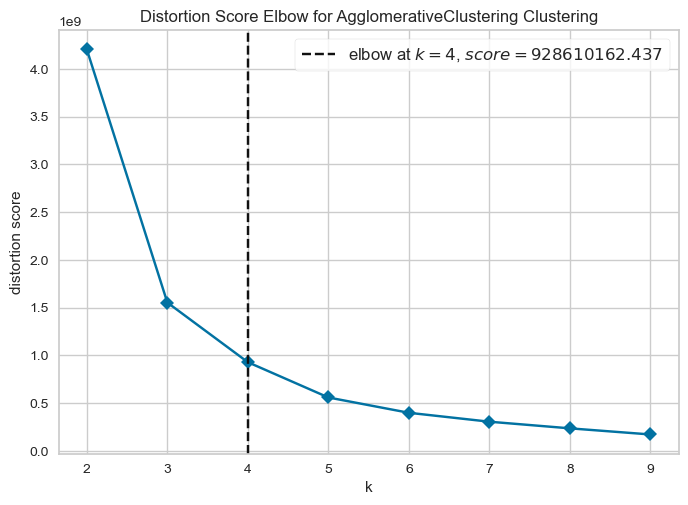

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [74]:
# 분류 종류의 수(k) 중 최적의 수 알아내기

# conda install -c districtdatalabs yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering()

# 실루엣 점수 확인 위해 K-elbow 시각화
# k값을 3 ~ 8로 설정
# timings : 클러스터링 모델을 훈련하는 데 필요한 시간(표시할 때 True, 기본값)

# model = KElbowVisualizer(model, k=(3,9), timings=True)
model = KElbowVisualizer(model, k=(2,10), timings=False)
model.fit(customer_invoice_df)

model.show()

In [85]:
agloCluster = AgglomerativeClustering(n_clusters=4).fit(rfm_normalization)

customer_invoice_df['cluster'] = agloCluster.labels_

print(customer_invoice_df['cluster'].value_counts())

customer_invoice_df

cluster
1    1990
3    1126
0     682
2     519
Name: count, dtype: int64


,CustomerID,Frequency,Recency,Monetary,cluster
0,12347.000000,0.022676,0.005362,0.015414,1
1,12348.000000,0.003758,0.201072,0.006422,3
2,12349.000000,0.009020,0.048257,0.006279,1
3,12350.000000,0.002005,0.831099,0.001188,0
4,12352.000000,0.011776,0.096515,0.005521,1
...,...,...,...,...,...
4312,18280.000000,0.001128,0.742627,0.000637,0
4313,18281.000000,0.000752,0.482574,0.000279,2
4314,18282.000000,0.001503,0.018767,0.000623,1
4315,0.011664,0.011664,0.011664,0.011664,1


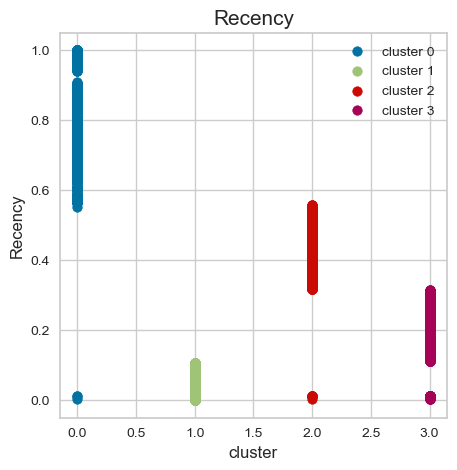

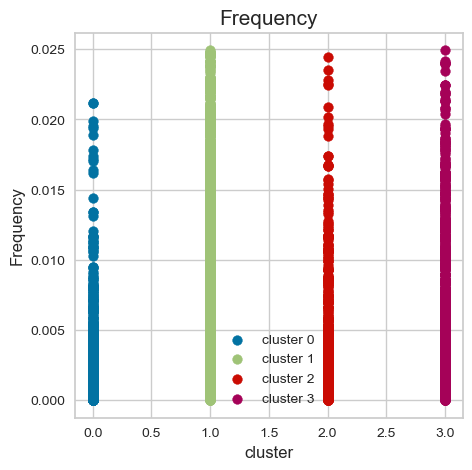

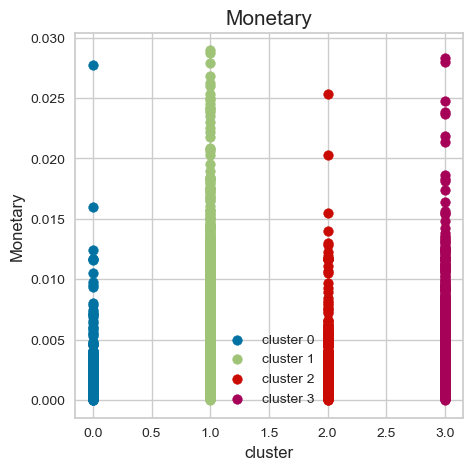

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recency : 얼마나 최근에 구매했는가
# Frequency : 얼마나 자주 구매했는가
# Monetary : 얼마나 많은 금액을 지출했는가
titles = ['Recency', 'Frequency', 'Monetary']

# 집단 개수
k = 4

# 각 항목별
for title in titles:
    plt.figure(figsize = (5, 5))
    
#     집단 별
    for i in range(k):
#         scatter: 산점도(분포도)
        plt.scatter(customer_invoice_df.loc[customer_invoice_df['cluster'] == i, 'cluster'], 
                    customer_invoice_df.loc[customer_invoice_df['cluster'] == i, title],
                    label = f'cluster {i}')
    
#     색상별 제목(label) 표시
    plt.legend()
    plt.title(title, size = 15)
    plt.xlabel('cluster', size = 12)
    plt.ylabel(title, size = 12)
    plt.show()

### boxplot
- 데이터의 분포와 이상치를 한 번에 볼 수 있으며, 서로 다른 집단을 쉽게 비교할 수 있는 차트이다.
<div style="display: flex">
    <img src="./images/boxplot2.png" width="400" style="margin-left: 20px">
    <img src="./images/boxplot1.png" width="400" style="margin-left: 20px">
<div>

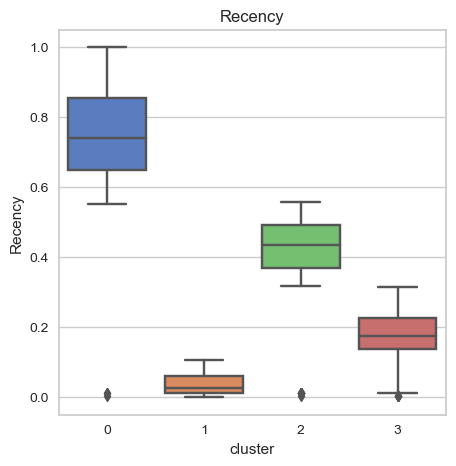

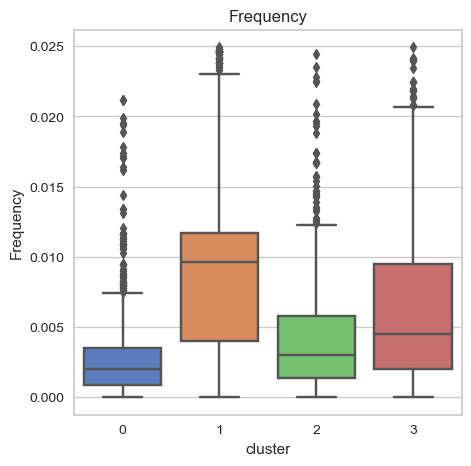

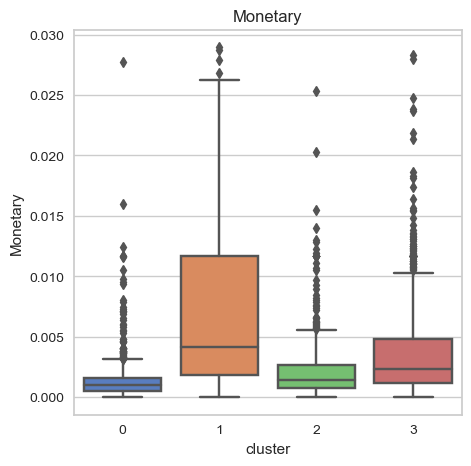

In [87]:
titles = ['Recency', 'Frequency', 'Monetary']

for title in titles:
    plt.figure(figsize = (5, 5))
    sns.boxplot(x = customer_invoice_df.cluster, y = customer_invoice_df[title], palette='muted')
    plt.title(title)
    plt.show()

- R, F, M 점수는 1~4로 계산함.  
- 여기서는 최근 구매를 더 중요하다고 가정한다.
> Cluster 0: Bronze, (4, 1, 1) = 6  
Cluster 1: VIP, (1, 4, 4) = 9  
Cluster 2: Silver, (3, 2, 2) = 7  
Cluster 3: Gold, (2, 3, 3) = 8  

In [88]:
customer_invoice_df['cluster'] = customer_invoice_df['cluster'].replace([0, 1, 2, 3], ['Bronze', 'VIP', 'Silver', 'Gold'])
customer_invoice_df

,CustomerID,Frequency,Recency,Monetary,cluster
0,12347.000000,0.022676,0.005362,0.015414,VIP
1,12348.000000,0.003758,0.201072,0.006422,Gold
2,12349.000000,0.009020,0.048257,0.006279,VIP
3,12350.000000,0.002005,0.831099,0.001188,Bronze
4,12352.000000,0.011776,0.096515,0.005521,VIP
...,...,...,...,...,...
4312,18280.000000,0.001128,0.742627,0.000637,Bronze
4313,18281.000000,0.000752,0.482574,0.000279,Silver
4314,18282.000000,0.001503,0.018767,0.000623,VIP
4315,0.011664,0.011664,0.011664,0.011664,VIP


Cluster Count:
cluster
VIP       1990
Gold      1126
Bronze     682
Silver     519
Name: count, dtype: int64


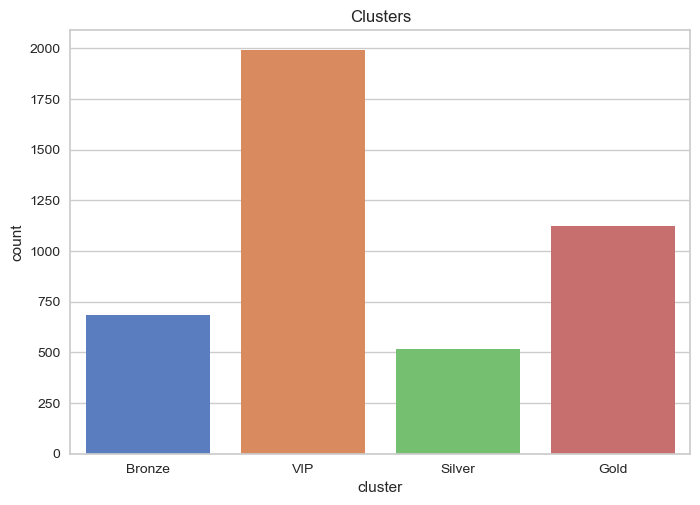

In [89]:
order = ['Bronze', 'VIP', 'Silver', 'Gold']
# create a countplot
print('Cluster Count:')
print(customer_invoice_df['cluster'].value_counts())

sns.countplot(x='cluster', data=customer_invoice_df, palette='muted', order=order)
plt.title('Clusters')
plt.show()